In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.datasets import load_iris


In [8]:
iris = load_iris()

In [9]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [11]:
# independent variables
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [13]:
# dependent variable
y = iris['target']

In [14]:
## train-test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 10)

In [29]:
## here in Decision Tree we dont need to scale the data
## apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier(max_depth=2)

In [30]:
treeclassifier.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]\nclass = virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'petal length (cm) <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]\nclass = virginica'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.159\nsamples = 46\nvalue = [0, 4, 42]\nclass = virginica')]

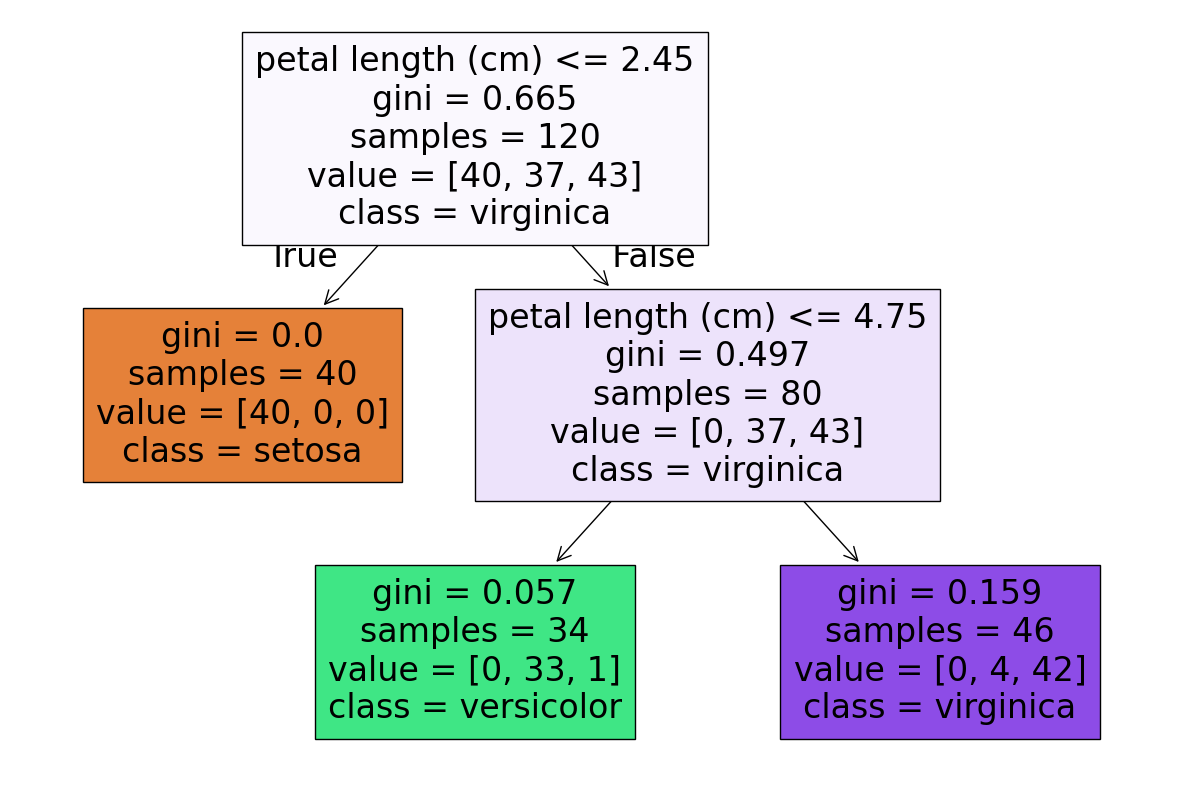

In [31]:
# Visualize the decision tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True, feature_names=iris.feature_names, class_names=iris.target_names)

In [32]:
y_pred = treeclassifier.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]


### Decision Tree Classifier Prepruning and Hyperparameter

In [34]:
param = {
    'criterion': ['gini', 'entropy','logloss'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
    'max_features': ['auto', 'sqrt', 'log2'],
    
}

In [35]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = treeclassifier,param_grid=param,scoring='accuracy')

In [36]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train,y_train)

,estimator,DecisionTreeC...r(max_depth=2)
,param_grid,"{'criterion': ['gini', 'entropy', ...], 'max_depth': [2, 3, ...], 'max_features': ['auto', 'sqrt', ...], 'splitter': ['best', 'random']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [37]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'splitter': 'random'}

In [38]:
grid.best_score_

np.float64(0.95)

In [39]:
y_pred = grid.predict(X_test)

In [40]:
print("Accuracy after hyperparameter tuning:", accuracy_score(y_test, y_pred))
print("Classification Report after hyperparameter tuning:\n", classification_report(y_test, y_pred))
print("Confusion Matrix after hyperparameter tuning:\n", confusion_matrix(y_test, y_pred))

Accuracy after hyperparameter tuning: 0.8666666666666667
Classification Report after hyperparameter tuning:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.69      0.82        13
           2       0.64      1.00      0.78         7

    accuracy                           0.87        30
   macro avg       0.88      0.90      0.87        30
weighted avg       0.92      0.87      0.87        30

Confusion Matrix after hyperparameter tuning:
 [[10  0  0]
 [ 0  9  4]
 [ 0  0  7]]
